
Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading dataset

In [ ]:
data = pd.read_csv('/content/movie_success_rate.csv')

Data Preprocessing

In [ ]:
data.shape

(839, 33)

In [ ]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

In [ ]:
data.isnull().sum()

,0
Rank,1
Title,1
Genre,1
Description,1
Director,1
Actors,1
Year,1
Runtime (Minutes),1
Rating,0
Votes,0


In [ ]:
print("Shape before dropping rows with nulls:", data.shape)
data = data.dropna()
print("Shape after dropping rows with nulls:", data.shape)

Shape before dropping rows with nulls: (838, 33)
Shape after dropping rows with nulls: (838, 33)


In [ ]:
data = data.drop(columns=['Title', 'Description', 'Director', 'Actors'])
data = data.drop(columns=['Genre'])

In [ ]:
X = data.drop(columns=['Success'])
y = data['Success']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dats Visualization

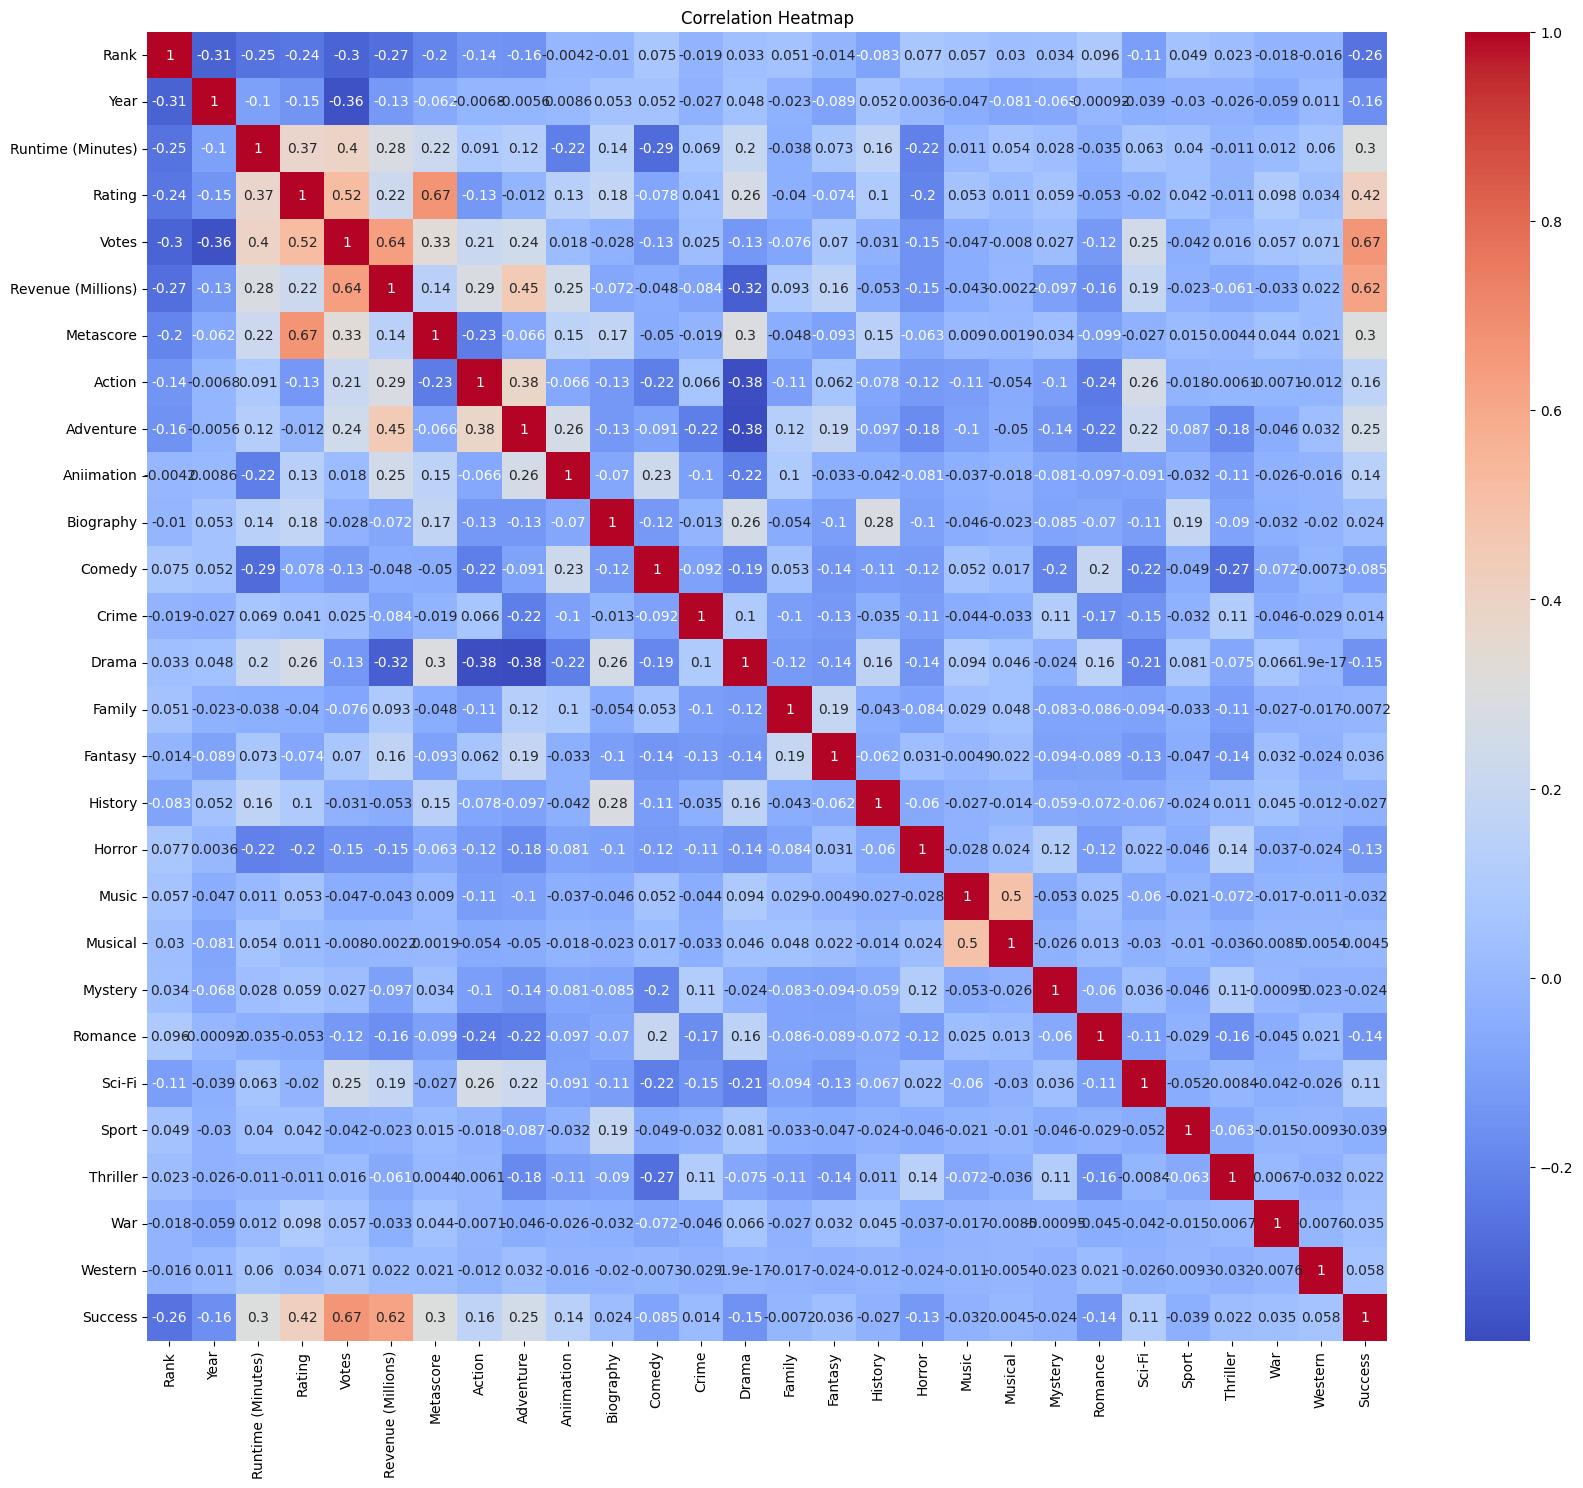

In [ ]:
plt.figure(figsize=(20, 17))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

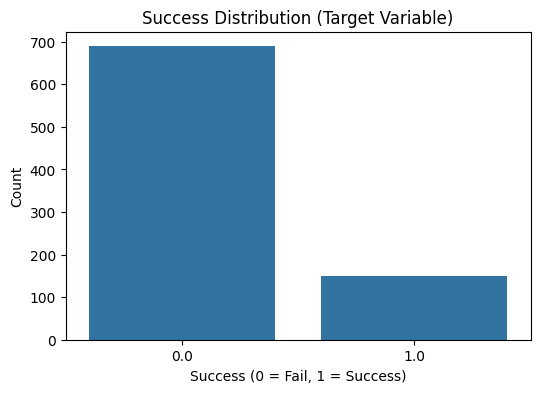

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Success', data=data)
plt.title("Success Distribution (Target Variable)")
plt.xlabel("Success (0 = Fail, 1 = Success)")
plt.ylabel("Count")
plt.show()

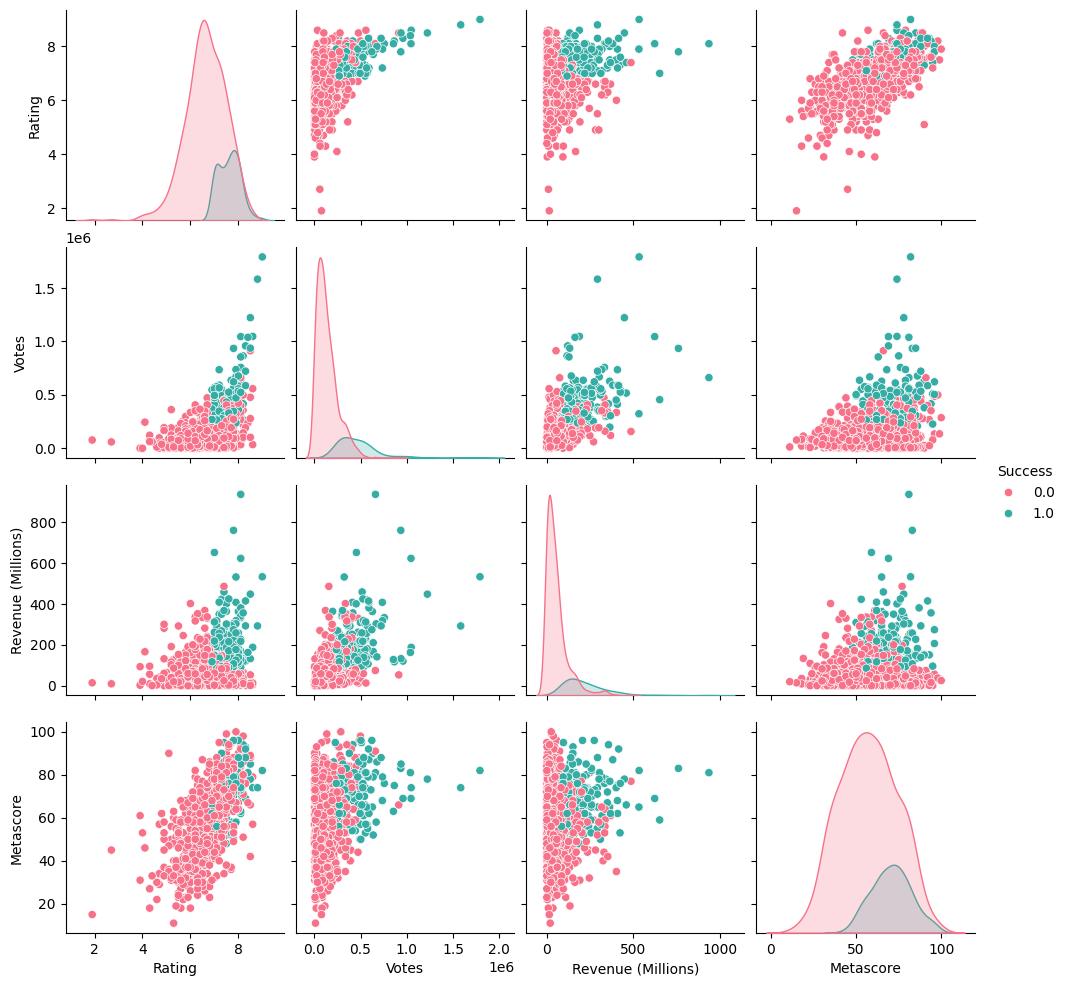

In [ ]:
selected_features = ['Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
sns.pairplot(data[selected_features + ['Success']], hue='Success', palette='husl')
plt.show()

Initializing Models

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [53]:
svm_model = SVC(kernel='rbf', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

Training SVM

In [54]:
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

Evaluating SVM

In [56]:
print("\n--- SVM Results ---")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("\nClassification Report (SVM):\n", classification_report(y_test, svm_preds))
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, svm_preds))


--- SVM Results ---
Accuracy: 0.9047619047619048

Classification Report (SVM):
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       133
         1.0       0.85      0.66      0.74        35

    accuracy                           0.90       168
   macro avg       0.88      0.81      0.84       168
weighted avg       0.90      0.90      0.90       168

Confusion Matrix (SVM):
 [[129   4]
 [ 12  23]]


Training Random Forest

In [55]:
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

Evaluating Random Forest

In [57]:
print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, rf_preds))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, rf_preds))


--- Random Forest Results ---
Accuracy: 0.9940476190476191

Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       133
         1.0       1.00      0.97      0.99        35

    accuracy                           0.99       168
   macro avg       1.00      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168

Confusion Matrix (Random Forest):
 [[133   0]
 [  1  34]]


Comparing Accuracy Scores

In [58]:
svm_accuracy = accuracy_score(y_test, svm_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

Plotting Accuracy Comparision

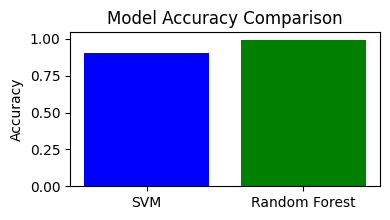

In [61]:
plt.figure(figsize=(4, 2))
plt.bar(['SVM', 'Random Forest'], [svm_accuracy, rf_accuracy], color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()